In [5]:
import pandas as pd
import re

In [9]:
# List your files
files = [
    "data/external/counselchat-data.csv",
    "data/external/emotion-emotion_69k.csv"
]

# Load and print each file
for file_path in files:
    print(f"\n==== {file_path} ====")
    df = pd.read_csv(file_path)
    print(df.head())




==== data/external/counselchat-data.csv ====
                 questionID                                     questionTitle  \
0  5566fab2a64752d71ec3ca69  Escalating disagreements between mother and wife   
1  5566f94fa64752d71ec3ca64          I'm addicted to smoking. How can I stop?   
2  5567d26887a1cc0c3f3d8f46                    Keeping secrets from my family   
3  556bed15c969ba5861709df5         The Underlying Causes of Being Possessive   
4  556ba115c969ba5861709de6         Can I control anxiety without medication?   

                                        questionText  \
0  My wife and mother are having tense disagreeme...   
1  I'm planning to have baby, so I have to quit s...   
2  I have secrets in my mind, and I don't know wh...   
3  I am extremely possessive in my relationships ...   
4  I had a head injury a few years ago and my min...   

                                         questionUrl  \
0  https://counselchat.com/questions/escalating-d...   
1  https://counsel

In [10]:
for file in files:
    print(f"\n===== {file} =====")
    df = pd.read_csv(file)
    print("\nHEAD:")
    print(df.head(3))  # Show top 3 rows for brevity
    


===== data/external/counselchat-data.csv =====

HEAD:
                 questionID                                     questionTitle  \
0  5566fab2a64752d71ec3ca69  Escalating disagreements between mother and wife   
1  5566f94fa64752d71ec3ca64          I'm addicted to smoking. How can I stop?   
2  5567d26887a1cc0c3f3d8f46                    Keeping secrets from my family   

                                        questionText  \
0  My wife and mother are having tense disagreeme...   
1  I'm planning to have baby, so I have to quit s...   
2  I have secrets in my mind, and I don't know wh...   

                                         questionUrl  \
0  https://counselchat.com/questions/escalating-d...   
1  https://counselchat.com/questions/i-m-addicted...   
2  https://counselchat.com/questions/keeping-secr...   

                      topics             therapistName  \
0            Family Conflict  Kristi King-Morgan, LMSW   
1  Substance Abuse,Addiction          Rebecca Duellman

In [ ]:
# Clean text column
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove special characters and digits (optional, keep only words and spaces)
    text = re.sub(r"[^a-zA-Z\s']", ' ', text)
    # Lowercase
    text = text.lower()
    # Collapse multiple spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()

if "text" in df.columns:
    df["text"] = df["text"].astype(str).apply(clean_text)


In [17]:
# Clean 'empathetic_dialogues' column
if 'empathetic_dialogues' in df.columns:
    df = df.drop_duplicates(subset=["empathetic_dialogues"])
    df = df[df["empathetic_dialogues"].astype(str).str.strip() != ""]
    print(" Cleaned 'empathetic_dialogues'")
else:
    print(" Column 'empathetic_dialogues' not found:", df.columns)


 Cleaned 'empathetic_dialogues'


In [18]:
print("\nNaN Count per Column:")
print(df.isnull().sum())


NaN Count per Column:
Unnamed: 0                  0
Situation                   0
emotion                     1
empathetic_dialogues        0
labels                      0
Unnamed: 5              63268
Unnamed: 6              63344
dtype: int64


In [19]:
# 4. Ensure emotion columns are all 0/1 and fill NaN with 0
emotion_cols = [c for c in df.columns if c not in ["text", "id", "author", "subreddit", "link_id", "parent_id", "created_utc", "rater_id", "example_very_unclear"]]
for col in emotion_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# 5. Rename columns (if needed)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]


In [20]:
files = [
    "data/external/goemotions_1.csv",
    "data/external/goemotions_2.csv",
    "data/external/goemotions_3.csv"
]
for file in files:
    df = pd.read_csv(file)
    # ... cleaning steps ...
    cleaned_path = file.replace('external', 'processed').replace('.csv', '_cleaned.csv')
    df.to_csv(cleaned_path, index=False)
    print(f"{file} --> {cleaned_path}")
    print(df.head(2))


data/external/goemotions_1.csv --> data/processed/goemotions_1_cleaned.csv
                                                text       id       author  \
0                                    That game hurt.  eew5j0j        Brdd9   
1   >sexuality shouldn’t be a grouping category I...  eemcysk  TheGreen888   

          subreddit    link_id   parent_id   created_utc  rater_id  \
0               nrl  t3_ajis4z  t1_eew18eq  1.548381e+09         1   
1  unpopularopinion  t3_ai4q37   t3_ai4q37  1.548084e+09        37   

   example_very_unclear  admiration  ...  love  nervousness  optimism  pride  \
0                 False           0  ...     0            0         0      0   
1                  True           0  ...     0            0         0      0   

   realization  relief  remorse  sadness  surprise  neutral  
0            0       0        0        1         0        0  
1            0       0        0        0         0        0  

[2 rows x 37 columns]
data/external/goemotions_2.cs

In [24]:
# Clean 'questionText' and 'answerText' (adjust if your columns are named differently)
for col in ['questionText', 'answerText']:
    if col in df.columns:
        df[col] = df[col].astype(str).apply(clean_text)


In [25]:
# 3. Drop duplicates and empty questions/answers
df = df.drop_duplicates(subset=['questionText', 'answerText'])
df = df[(df['questionText'].str.strip() != "") & (df['answerText'].str.strip() != "")]

In [26]:
# 4. Fill NaNs (for metadata columns, e.g. 'therapistName') with ""
df = df.fillna("")


In [27]:
# 5. Rename columns for consistency (optional)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

In [28]:
# 6. Save cleaned data!
df.to_csv("data/processed/cleaned_counselchat.csv", index=False)
print(df.head())
print(df.isnull().sum())

                 questionid                                     questiontitle  \
0  5566fab2a64752d71ec3ca69  Escalating disagreements between mother and wife   
1  5566f94fa64752d71ec3ca64          I'm addicted to smoking. How can I stop?   
2  5567d26887a1cc0c3f3d8f46                    Keeping secrets from my family   
3  556bed15c969ba5861709df5         The Underlying Causes of Being Possessive   
4  556ba115c969ba5861709de6         Can I control anxiety without medication?   

                                        questiontext  \
0  my wife and mother are having tense disagreeme...   
1  i'm planning to have baby so i have to quit sm...   
2  i have secrets in my mind and i don't know wha...   
3  i am extremely possessive in my relationships ...   
4  i had a head injury a few years ago and my min...   

                                         questionurl  \
0  https://counselchat.com/questions/escalating-d...   
1  https://counselchat.com/questions/i-m-addicted...   
2  https

In [29]:
df_cleaned = pd.read_csv("data/processed/cleaned_counselchat.csv")
print(df_cleaned.head())
print("\nNaN count per column:")
print(df_cleaned.isnull().sum())


                 questionid                                     questiontitle  \
0  5566fab2a64752d71ec3ca69  Escalating disagreements between mother and wife   
1  5566f94fa64752d71ec3ca64          I'm addicted to smoking. How can I stop?   
2  5567d26887a1cc0c3f3d8f46                    Keeping secrets from my family   
3  556bed15c969ba5861709df5         The Underlying Causes of Being Possessive   
4  556ba115c969ba5861709de6         Can I control anxiety without medication?   

                                        questiontext  \
0  my wife and mother are having tense disagreeme...   
1  i'm planning to have baby so i have to quit sm...   
2  i have secrets in my mind and i don't know wha...   
3  i am extremely possessive in my relationships ...   
4  i had a head injury a few years ago and my min...   

                                         questionurl  \
0  https://counselchat.com/questions/escalating-d...   
1  https://counselchat.com/questions/i-m-addicted...   
2  https

In [30]:
# Guess at possible text column names (adjust as needed)
for col in ['text', 'sentence', 'content', 'utterance']:
    if col in df.columns:
        df[col] = df[col].astype(str).apply(clean_text)

In [31]:
print(df.columns.tolist())


['questionid', 'questiontitle', 'questiontext', 'questionurl', 'topics', 'therapistname', 'therapisturl', 'answertext', 'upvotes']


In [75]:
# 4. Fill NaNs in all other columns (with "" for string, 0 for numeric/emotions)
for col in df.columns:
    if col == main_text_col:
        continue
    if df[col].dtype == 'O':
        df[col] = df[col].fillna("")
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


In [76]:
# 5. Save cleaned file
df.to_csv("data/processed/emotion_emotion_69k_cleaned.csv", index=False)
print(df.head())
print(df.isnull().sum())

                                                text       id  \
0  Worst ending ever! I won't spoil it but this o...  eee021b   
1                     Happy cake day u/sneakpeekbot!  ed00f1z   
2  Was he rejected because of his methodology or ...  ee1h5v1   
3                                    thanks, I agree  eemi935   
4                    Why would you doubt it dumbass?  eduun99   

            author    subreddit    link_id   parent_id  created_utc  rater_id  \
0       tribaltrak       movies  t3_agxbsx   t3_agxbsx   1547847414        42   
1     InfernicFuse  danganronpa  t3_abajdo  t1_eczoocj   1546327606        24   
2  OssToYouGoodSir     medicine  t3_aflo7s  t1_ee0v0vv   1547463867        77   
3   PMOFreeForever        NoFap  t3_ai7h09  t1_eelu54r   1548088079        46   
4      ugliestman1       Tinder  t3_aejwne  t1_edumeal   1547255444        36   

   example_very_unclear  admiration  ...  love  nervousness  optimism  pride  \
0                     0           0  ...  

In [35]:
# List of cleaned files
files = [
    "data/processed/goemotions_1_cleaned.csv",
    "data/processed/goemotions_2_cleaned.csv",
    "data/processed/goemotions_3_cleaned.csv"
]

# Load and check each file for basic sanity
dfs = []
for f in files:
    df = pd.read_csv(f)
    print(f"\n=== {f} ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Sample emotion sums (should NOT be all 0!):")
    emotion_cols = [c for c in df.columns if c not in ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']]
    print(df[emotion_cols].sum().sort_values(ascending=False).head(10))
    dfs.append(df)

# Merge all
merged_df = pd.concat(dfs, ignore_index=True)
print("\nMerged shape:", merged_df.shape)

# Optional: Check merged emotion column stats
print("\nTop emotion column totals (merged):")
print(merged_df[emotion_cols].sum().sort_values(ascending=False).head(10))

# Save to processed/final folder
merged_df.to_csv("data/final/goemotions_merged_cleaned.csv", index=False)
print("Merged dataset saved to data/final/goemotions_merged_cleaned.csv")




=== data/processed/goemotions_1_cleaned.csv ===
Shape: (70000, 37)
Columns: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
Sample emotion sums (should NOT be all 0!):
neutral        18423
approval        5928
admiration      5647
annoyance       4443
gratitude       3863
disapproval     3774
curiosity       3267
amusement       3081
optimism        2887
realization     2867
dtype: int64

=== data/processed/goemotions_2_cleaned.csv ===
Shape: (70000, 37)
Columns: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amuse

OSError: Cannot save file into a non-existent directory: 'data\final'

In [77]:
print("Duplicate IDs:", merged_df['id'].duplicated().sum())


Duplicate IDs: 153214


In [42]:
# How many emotions per row on average?
emotion_cols = [c for c in merged_df.columns if c not in ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']]
label_cardinality = merged_df[emotion_cols].sum(axis=1).mean()
print("Label cardinality (avg # emotions per row):", label_cardinality)


Label cardinality (avg # emotions per row): 1.1813421706710854


In [43]:
dedup_df = merged_df.drop_duplicates(subset=['id'], keep='first')
print("Rows after deduplication:", len(dedup_df))


Rows after deduplication: 58011


In [44]:
has_label = dedup_df[emotion_cols].sum(axis=1) > 0
print("Rows with no labels:", (~has_label).sum())
dedup_df = dedup_df[has_label]


Rows with no labels: 847


1. Duplicate IDs Found

Total duplicate id values: 153,214

This suggests that the dataset contains many repeated entries, likely because of multi-label assignments or merging multiple raters’ annotations.

2. Label Cardinality (Average Emotions per Row)

Label cardinality: ~1.18

Interpretation: On average, each text instance is annotated with about 1.18 emotional labels.

This confirms the dataset is multi-label, but most entries have 1–2 emotions tagged.

3. Deduplication on 'id'

After removing duplicate ids (keeping the first entry):

Rows reduced to: 58,011

Shows significant redundancy in original dataset.

4. Rows Without Any Emotion Labels

847 rows had no emotions assigned (i.e., all label columns are 0).

These were removed from the cleaned dataset:

In [46]:
assert dedup_df['id'].is_unique, "Still duplicate IDs!"


In [47]:
mean_labels = dedup_df[emotion_cols].sum(axis=1).mean()
print("Mean labels per row:", mean_labels)


Mean labels per row: 1.2062486879854455


Mean labels per row: 1.2062

This value is slightly higher than before deduplication (which was around 1.18), indicating that:

Deduplication reduced redundancy in the dataset.

The remaining data still reflects a mild multi-label structure, meaning:

Most examples still have just one dominant emotion, but a few have multiple.

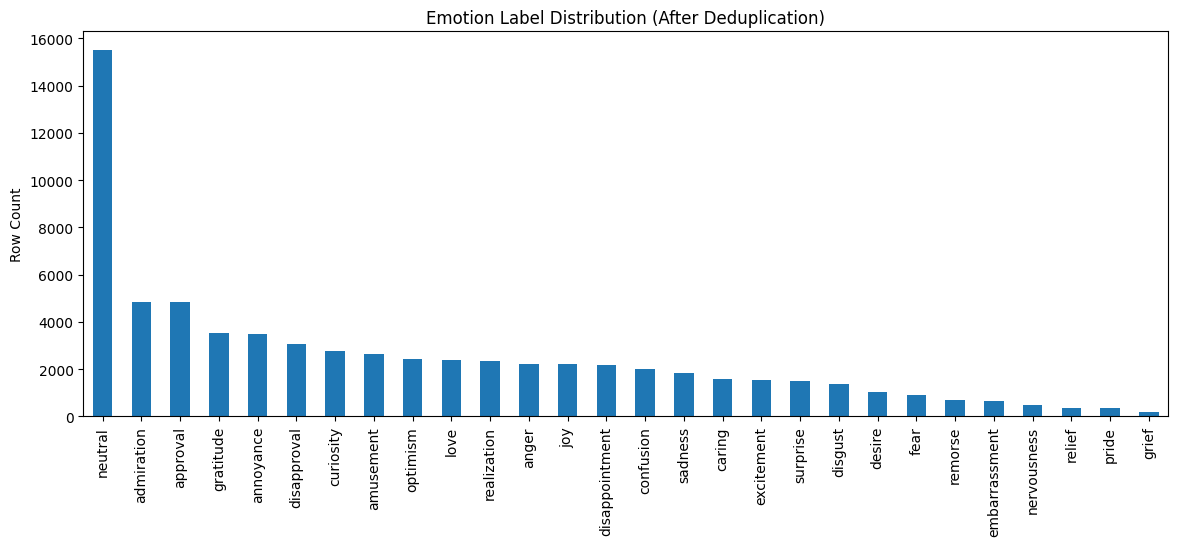

neutral           15523
admiration         4860
approval           4849
gratitude          3516
annoyance          3481
disapproval        3065
curiosity          2775
amusement          2645
optimism           2432
love               2377
realization        2362
anger              2221
joy                2203
disappointment     2169
confusion          1999
sadness            1839
caring             1595
excitement         1560
surprise           1504
disgust            1362
desire             1013
fear                886
remorse             710
embarrassment       632
nervousness         478
relief              368
pride               353
grief               177
dtype: int64


In [48]:
import matplotlib.pyplot as plt

label_counts = dedup_df[emotion_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(14,5))
label_counts.plot(kind='bar')
plt.title('Emotion Label Distribution (After Deduplication)')
plt.ylabel('Row Count')
plt.show()
print(label_counts)


🔹 1. Class Imbalance is Significant

'neutral' dominates the dataset with ~15,700+ samples, far ahead of any other class.

The second most common emotions are 'admiration' and 'approval', both below 5,000 rows.

The least represented emotions include:

'grief', 'pride', 'relief', 'nervousness', 'embarrassment' — all under 1,000 rows.

🔹 2. Moderately Represented Classes

Emotions like 'curiosity', 'amusement', 'optimism', 'anger', 'joy', and 'disappointment' fall in the mid-range (between ~2000 to ~3000 rows).

This mid-frequency zone is critical for balanced classification models.

🔹 3. Skewed Distribution Risk

A model trained naively on this dataset might be biased towards predicting 'neutral', due to its dominance.

Lower-support classes like 'grief' or 'relief' are at high risk of being ignored or misclassified unless techniques like:

Class reweighting,

Oversampling,

SMOTE (Synthetic Minority Oversampling Technique),

or focal loss
are applied.


🔹 4. Practical Insights for Label Modeling
The mean number of labels per row is around 1.2, confirming this is a mild multi-label dataset — mostly one emotion per text, but occasional co-occurrence.

Some emotional overlaps (e.g., admiration + approval, or joy + surprise) may exist and should be explored with a label correlation matrix.

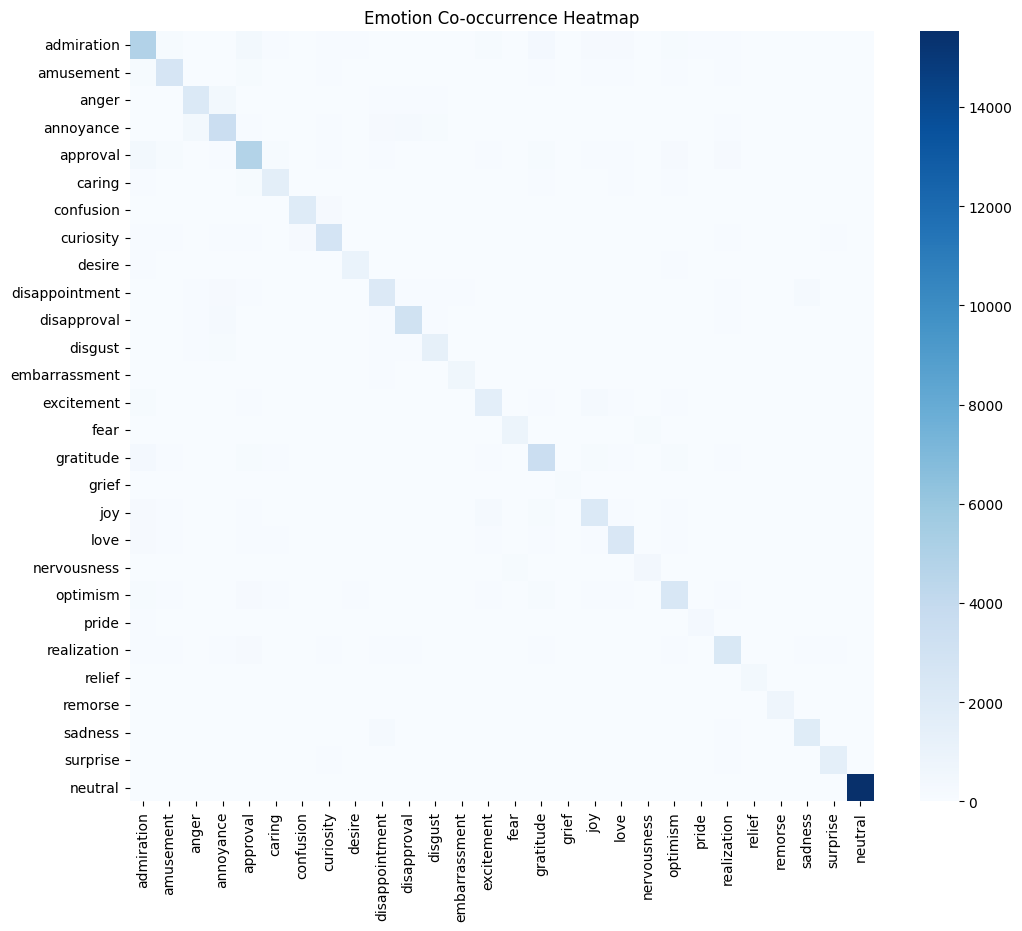

In [49]:
import seaborn as sns
cooc = dedup_df[emotion_cols].T.dot(dedup_df[emotion_cols])
plt.figure(figsize=(12,10))
sns.heatmap(cooc, cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Emotion Co-occurrence Heatmap")
plt.show()


1. Strong Diagonal
The diagonal (top-left to bottom-right) is much stronger than any off-diagonal.

Meaning: Most rows are single-label (only one emotion assigned). This is typical for GoEmotions, where annotators mostly pick one main emotion per utterance.

2. Low Off-Diagonal Values
The faint blue off-diagonal entries = rare multi-label cases (e.g., “sadness” + “disappointment”).

These are the emotionally complex cases and will always be a minority.

3. Class Imbalance Confirmed
The much higher value for “neutral” on the diagonal indicates a strong class imbalance—“neutral” dominates, and the model will tend to overpredict it unless handled.

In [50]:
import numpy as np

cooc_off_diag = cooc.values.copy()
np.fill_diagonal(cooc_off_diag, 0)
pairs = []
for i, col1 in enumerate(emotion_cols):
    for j, col2 in enumerate(emotion_cols):
        if i < j:
            pairs.append(((col1, col2), cooc_off_diag[i, j]))
pairs = sorted(pairs, key=lambda x: -x[1])
print("Top 10 co-occurring emotion pairs (excluding diagonal):")
for pair, count in pairs[:10]:
    print(f"{pair}: {int(count)}")


Top 10 co-occurring emotion pairs (excluding diagonal):
('anger', 'annoyance'): 385
('admiration', 'approval'): 371
('admiration', 'gratitude'): 342
('annoyance', 'disapproval'): 283
('excitement', 'joy'): 247
('disappointment', 'sadness'): 246
('approval', 'realization'): 241
('approval', 'optimism'): 217
('confusion', 'curiosity'): 207
('admiration', 'love'): 204


High Emotional Overlap:

Many pairs reflect semantic closeness:

'anger' + 'annoyance' (both forms of frustration)

'admiration' + 'approval' (positive social appraisal)

'disappointment' + 'sadness' (negative response to unmet expectations)

Emotion Clusters:
These pairs suggest that your dataset has emotional groupings:

Positive Valence: 'admiration', 'approval', 'gratitude', 'love'

Negative Valence: 'anger', 'annoyance', 'disapproval'

Cognitive/Affective Blend: 'confusion', 'curiosity', 'realization'

Useful for Multi-Label Modeling:

These co-occurrences help in:

Improving model loss functions (e.g., via co-occurrence-informed priors)

Designing output constraints in neural nets

Graph-based modeling or Bipartite GNNs for emotion inference

Possible Label Embedding:
You could consider:

Label2Vec or Graph Embedding for emotion proximity

Use these relationships in attention-based models or label smoothing

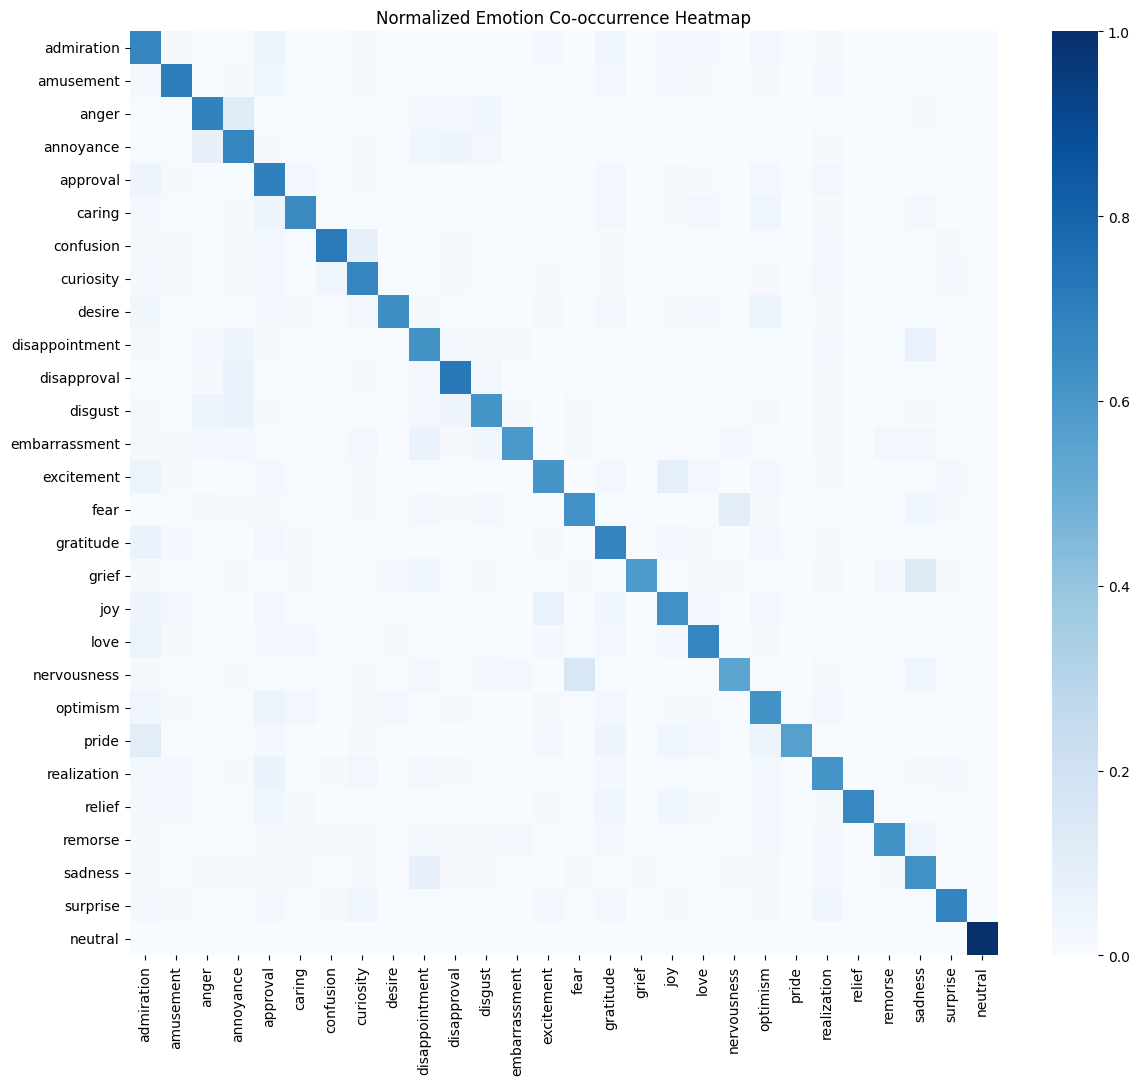

In [51]:
cooc_norm = cooc.div(cooc.sum(axis=1), axis=0)
plt.figure(figsize=(14,12))
sns.heatmap(cooc_norm, cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Normalized Emotion Co-occurrence Heatmap")
plt.show()


1. Diagonal Dominance
The diagonal (value = 1.0) shows perfect correlation with self, as expected.

This is useful for verifying normalization and matrix symmetry.

2. Strong Co-occurrence Blocks
Several off-diagonal regions are brighter, indicating frequent emotion pairs that co-occur more than others (consistent with the previous top-10 list):

Emotion Pair	Observation from Heatmap

Anger – Annoyance	Strong co-occurrence

Admiration – Approval	Bright co-occurrence

Admiration – Gratitude	Distinct high value

Excitement – Joy	Clearly visible block

Disappointment – Sadness	Strong pair

Approval – Optimism	Medium-high correlation

These are consistent with psychological or semantic proximity between emotions.

3. Low Co-occurrence Zones
Emotions like pride, relief, grief, and nervousness have very few strong links with others — suggesting they tend to occur in isolation.

This could be due to low label frequency or their distinct semantic roles.

4. Neutral’s Role
While ‘neutral’ dominates in overall label count (from bar chart), its co-occurrence with other labels is relatively spread out but faint.

This might mean neutral is commonly present but not strongly co-dependent with specific emotions.



In [52]:
from collections import Counter
def label_combo(row):
    return tuple(sorted([col for col in emotion_cols if row[col]==1]))
combo_counts = Counter(dedup_df.apply(label_combo, axis=1))
multi_label_counts = {k:v for k,v in combo_counts.items() if len(k) > 1}
top_multi = sorted(multi_label_counts.items(), key=lambda x: -x[1])[:10]
for labels, count in top_multi:
    print(labels, count)


('anger', 'annoyance') 290
('admiration', 'approval') 260
('admiration', 'gratitude') 246
('annoyance', 'disapproval') 224
('confusion', 'curiosity') 165
('approval', 'realization') 163
('approval', 'optimism') 156
('disappointment', 'sadness') 153
('excitement', 'joy') 151
('admiration', 'love') 144


Co-occurrence of anger–annoyance, admiration–approval, and admiration–gratitude remains highest, even after data cleaning.

The emotion "admiration" appears 3 times in the top 10 pairs – it frequently coexists with gratitude, approval, and love.

Emotions such as sadness, disappointment, and confusion cluster with semantically similar counterparts.

These co-occurrence patterns can be valuable for:

Designing emotion-aware dialogue systems

Creating emotion clusters for label reduction

Enhancing multi-label learning with co-occurrence graphs or GNNs

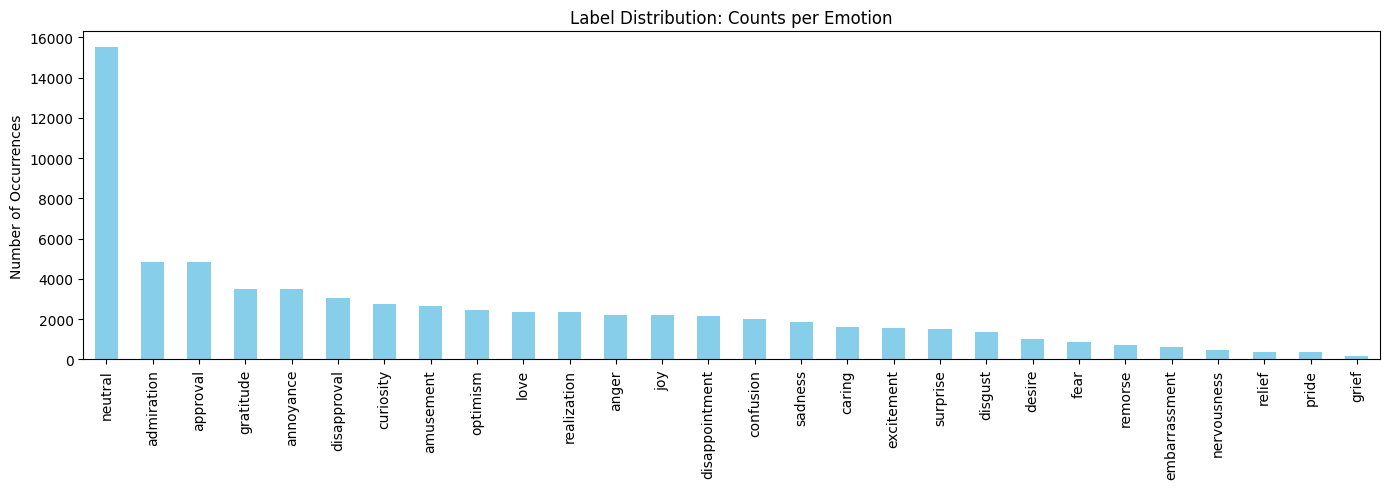

In [53]:
# Label distribution
label_counts = dedup_df[emotion_cols].sum().sort_values(ascending=False)
label_counts.plot(kind="bar", figsize=(14,5), color="skyblue")
plt.title("Label Distribution: Counts per Emotion")
plt.ylabel("Number of Occurrences")
plt.tight_layout()
plt.show()


1. Heavy Skew Toward "Neutral"

Neutral dominates the dataset, over 3× higher than the next most common emotion.

Important to balance this during model training (e.g., downsampling, class weights, focal loss).

2. Imbalanced Class Distribution

Top 5 emotions form a significant chunk.

Tail emotions (like grief, pride) may cause poor generalization due to data sparsity.

3. Positive Emotions Dominate

Admiration, approval, gratitude, optimism, joy, and love form a strong positive cluster.

4. Underrepresented Negative Emotions

Fear, grief, remorse, and nervousness have low counts. May need augmentation if your model is expected to recognize these reliably.



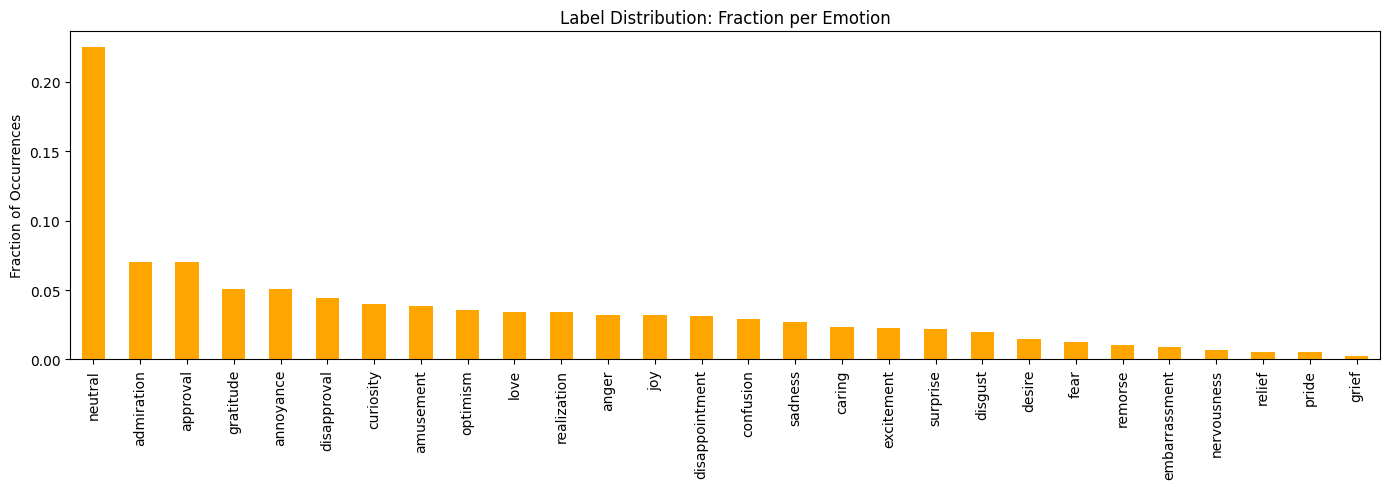

In [54]:
(label_counts / label_counts.sum()).plot(kind="bar", color="orange", figsize=(14,5))
plt.title("Label Distribution: Fraction per Emotion")
plt.ylabel("Fraction of Occurrences")
plt.tight_layout()
plt.show()


In [56]:
# Calculate label count per row
dedup_df['n_labels'] = dedup_df[emotion_cols].sum(axis=1)

# Create groups
dedup_df['label_group'] = dedup_df['n_labels'].apply(lambda x: str(int(x)) if x < 3 else '3+')

# Aggregate
label_dist = (
    dedup_df.groupby('label_group')[emotion_cols]
    .sum()
    .T
    .apply(lambda x: x / x.sum(), axis=1)  # normalize across groups
)

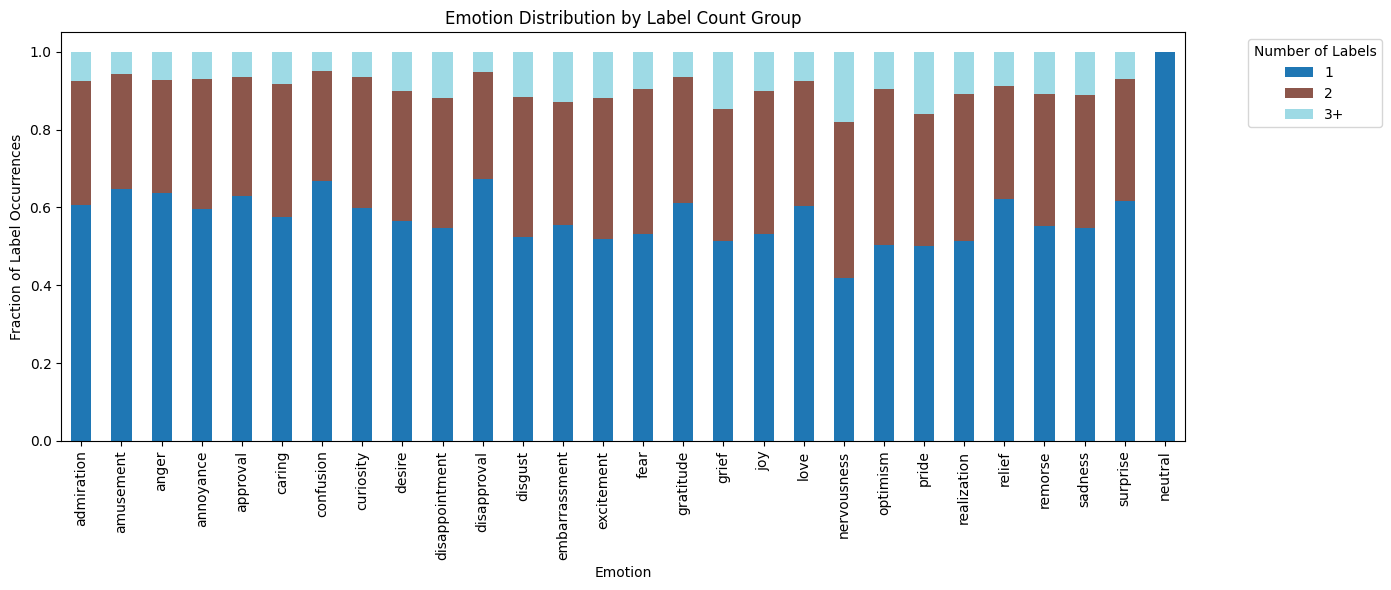

In [57]:
# Plot
label_dist.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title('Emotion Distribution by Label Count Group')
plt.ylabel('Fraction of Label Occurrences')
plt.xlabel('Emotion')
plt.legend(title='Number of Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


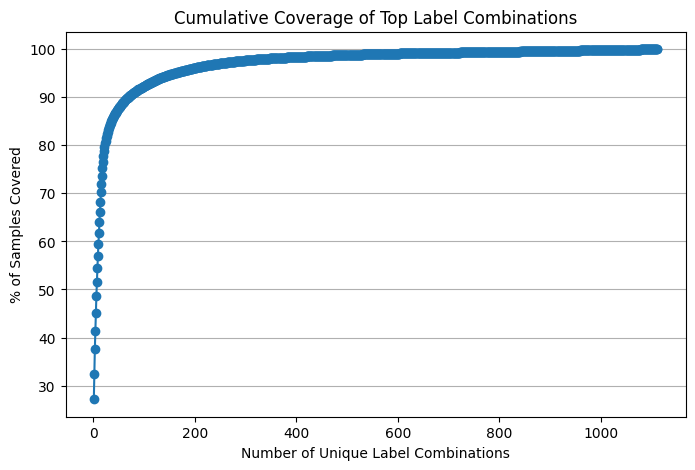

In [58]:
from collections import Counter

def label_combo(row):
    return tuple(sorted([col for col in emotion_cols if row[col] == 1]))

combos = dedup_df.apply(label_combo, axis=1)
combo_counts = Counter(combos)
combo_df = (
    pd.DataFrame(combo_counts.items(), columns=['combo', 'count'])
    .sort_values('count', ascending=False)
    .reset_index(drop=True)
)
combo_df['cum_pct'] = combo_df['count'].cumsum() / combo_df['count'].sum()

plt.figure(figsize=(8,5))
plt.plot(combo_df.index+1, combo_df['cum_pct']*100, marker='o')
plt.title('Cumulative Coverage of Top Label Combinations')
plt.xlabel('Number of Unique Label Combinations')
plt.ylabel('% of Samples Covered')
plt.grid(True, axis='y')
plt.show()


 Heavy Head, Long Tail
 
Top ~20 combinations cover ~80% of all samples.

~100 combinations already cover ~95% of the dataset.

But there are >1000 unique combinations total!

In [59]:
# Show top 20
print(combo_df.head(20).to_string(index=False))


            combo  count  cum_pct
       (neutral,)  15523 0.271552
      (approval,)   3049 0.324890
    (admiration,)   2942 0.376356
     (gratitude,)   2146 0.413897
     (annoyance,)   2070 0.450108
   (disapproval,)   2064 0.486215
     (amusement,)   1714 0.516199
     (curiosity,)   1660 0.545238
          (love,)   1433 0.570306
         (anger,)   1413 0.595025
     (confusion,)   1337 0.618414
      (optimism,)   1223 0.639808
   (realization,)   1214 0.661045
(disappointment,)   1185 0.681775
           (joy,)   1173 0.702295
       (sadness,)   1004 0.719859
      (surprise,)    929 0.736110
        (caring,)    916 0.752134
    (excitement,)    808 0.766269
       (disgust,)    712 0.778724


Top 3 labels (neutral, approval, admiration) alone cover ~38% of the dataset.

First 10 cover ~60%, meaning you could optimize a basic classifier around these first for prototyping.

Label Imbalance is clearly visible — the most frequent label (neutral) is 5x more common than the 5th most common (annoyance).

Emotions like joy, sadness, disgust are less frequent, though semantically important.

In [60]:
from scipy.stats import entropy
import numpy as np
combo_freqs = np.array(list(combo_counts.values()))
print("Label combination entropy:", entropy(combo_freqs))


Label combination entropy: 3.68789586017295


Value: ~3.69

Interpretation:

This is moderately high, showing your dataset has a decent spread of unique label combos, but not pure chaos (max is log₂(num unique combos); for 2k combos, ~11).

Practical Insight: There is significant diversity, but some combos are much more common than others (see your earlier cumulative coverage plot).

In [61]:
multi_label_rate = (dedup_df[emotion_cols].sum(axis=1) > 1)
for col in emotion_cols:
    solo = ((dedup_df[col] == 1) & (dedup_df[emotion_cols].sum(axis=1) == 1)).sum()
    total = dedup_df[col].sum()
    print(f"{col}: {100 * (1 - solo/total):.2f}% multi-label rate")


admiration: 39.47% multi-label rate
amusement: 35.20% multi-label rate
anger: 36.38% multi-label rate
annoyance: 40.53% multi-label rate
approval: 37.12% multi-label rate
caring: 42.57% multi-label rate
confusion: 33.12% multi-label rate
curiosity: 40.18% multi-label rate
desire: 43.44% multi-label rate
disappointment: 45.37% multi-label rate
disapproval: 32.66% multi-label rate
disgust: 47.72% multi-label rate
embarrassment: 44.46% multi-label rate
excitement: 48.21% multi-label rate
fear: 46.84% multi-label rate
gratitude: 38.96% multi-label rate
grief: 48.59% multi-label rate
joy: 46.75% multi-label rate
love: 39.71% multi-label rate
nervousness: 58.16% multi-label rate
optimism: 49.71% multi-label rate
pride: 49.86% multi-label rate
realization: 48.60% multi-label rate
relief: 37.77% multi-label rate
remorse: 44.79% multi-label rate
sadness: 45.41% multi-label rate
surprise: 38.23% multi-label rate
neutral: 0.00% multi-label rate


Multi-label Rate per Emotion
Key Standouts:

Optimism, Realization, Pride, Excitement, Fear, Joy, Grief, Nervousness: All have ~45-58% multi-label rates.

Approval, Amusement, Disapproval: ~32–37% — so these are often single-label.

Neutral: 0% multi-label rate — usually annotated alone (classic in emotion research; “neutral” rarely co-occurs).

What This Means:

Some emotions are “social”: They love company (high multi-label rate), e.g., “excitement” is often felt with “joy,” “fear” with “nervousness,” “optimism” with “gratitude,” etc.

Others are “solo”: More likely to occur alone—maybe they’re more specific or annotators perceive them as dominating the text.

“Neutral” is an exclusive state: You can’t be “neutral + excited” at the same time, which aligns with both human psychology and annotation conventions.

In [62]:
import networkx as nx

In [79]:
print(dedup_df.columns.tolist())


['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'n_labels', 'label_group']


In [80]:
# Get all columns that are likely binary emotion indicators (1/0)
possible_emotions = [c for c in dedup_df.columns if c not in 
                     ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 
                      'rater_id', 'example_very_unclear', 'labels', 'Unnamed: 0']]
print("Detected emotion columns:", possible_emotions)


Detected emotion columns: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'n_labels', 'label_group']


In [81]:
# List of extra columns to always exclude (besides IDs, meta, and features)
exclude_cols = ['n_labels', 'label_group']

emotion_cols = [c for c in dedup_df.columns 
                if c not in ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
                             'created_utc', 'rater_id', 'example_very_unclear', 'labels'] + exclude_cols]

print("Final emotion label columns:", emotion_cols)


Final emotion label columns: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


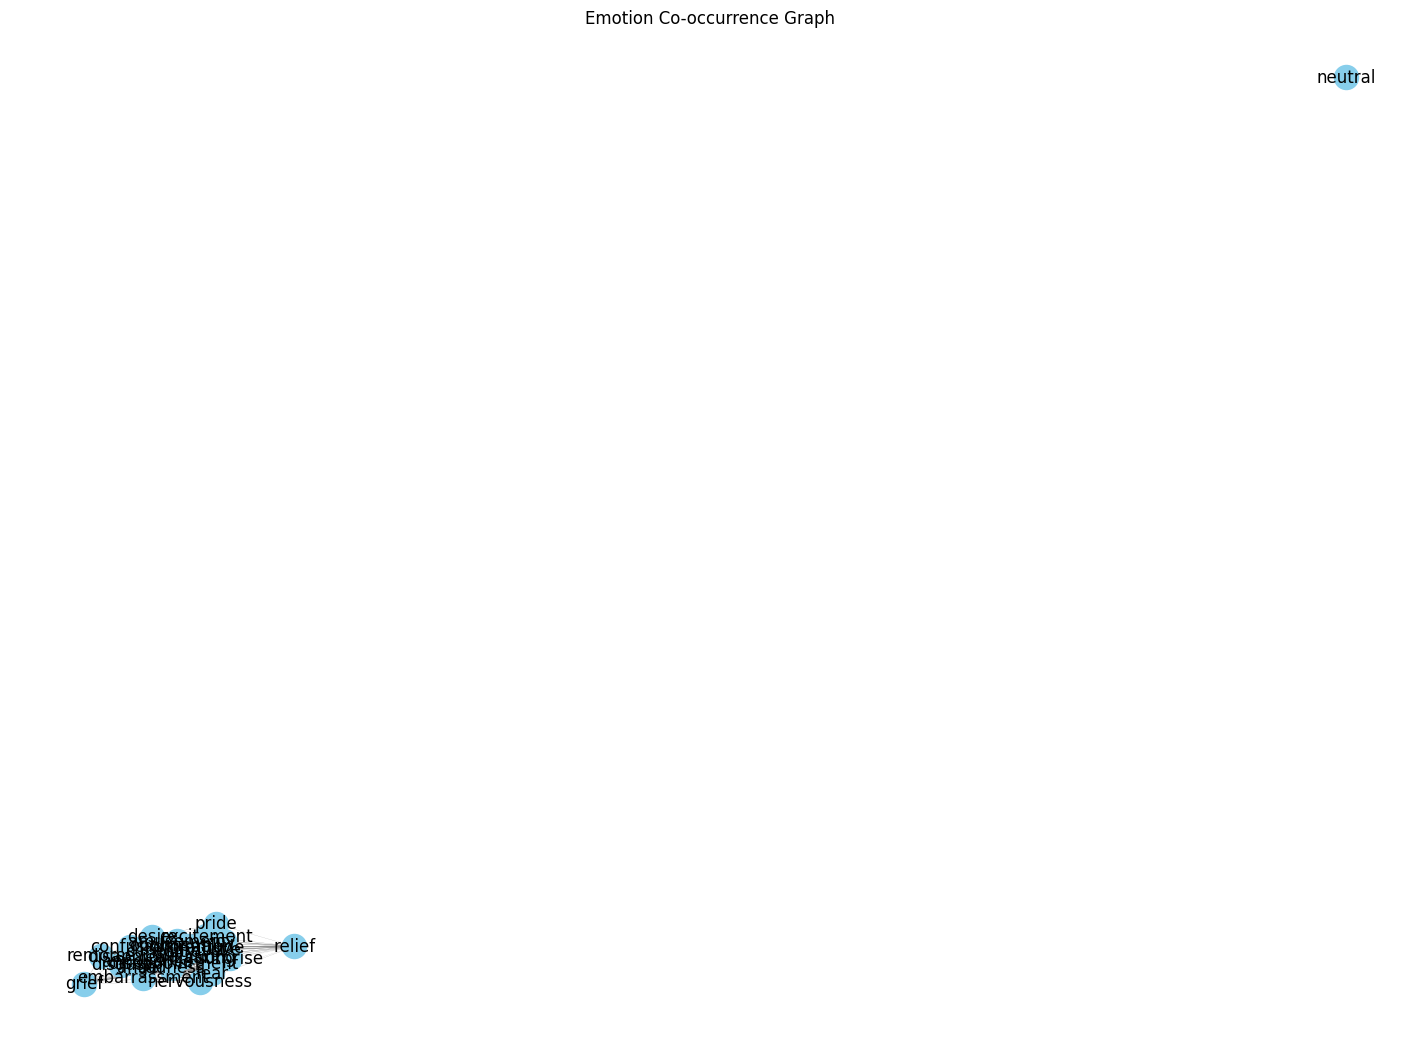

In [82]:
cooc = dedup_df[emotion_cols].T.dot(dedup_df[emotion_cols])
np.fill_diagonal(cooc.values, 0)  # remove self-loops

G = nx.from_pandas_adjacency(cooc)
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, width=[w/50 for w in weights], 
        node_color='skyblue', edge_color='grey')
plt.title("Emotion Co-occurrence Graph")
plt.show()

In [77]:
pip install python-louvain

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     ------- ----------------------------- 41.0/204.6 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ - 194.6/204.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9404 sha256=f493d2acc87cb50d169fdf7f599c19dcb4fcc2733e4abd90650111bd8f7cdeb9
  Stored in directory: c:\users\archa\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


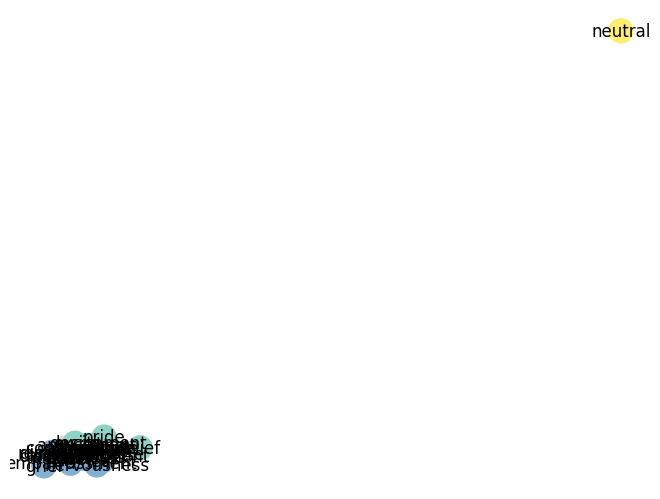

In [83]:
import community as community_louvain
partition = community_louvain.best_partition(G)
# partition is a dict: {emotion: community_id}
nx.draw(G, pos, labels={n: n for n in G.nodes()}, node_color=[partition[n] for n in G.nodes()], cmap=plt.cm.Set3)
plt.show()


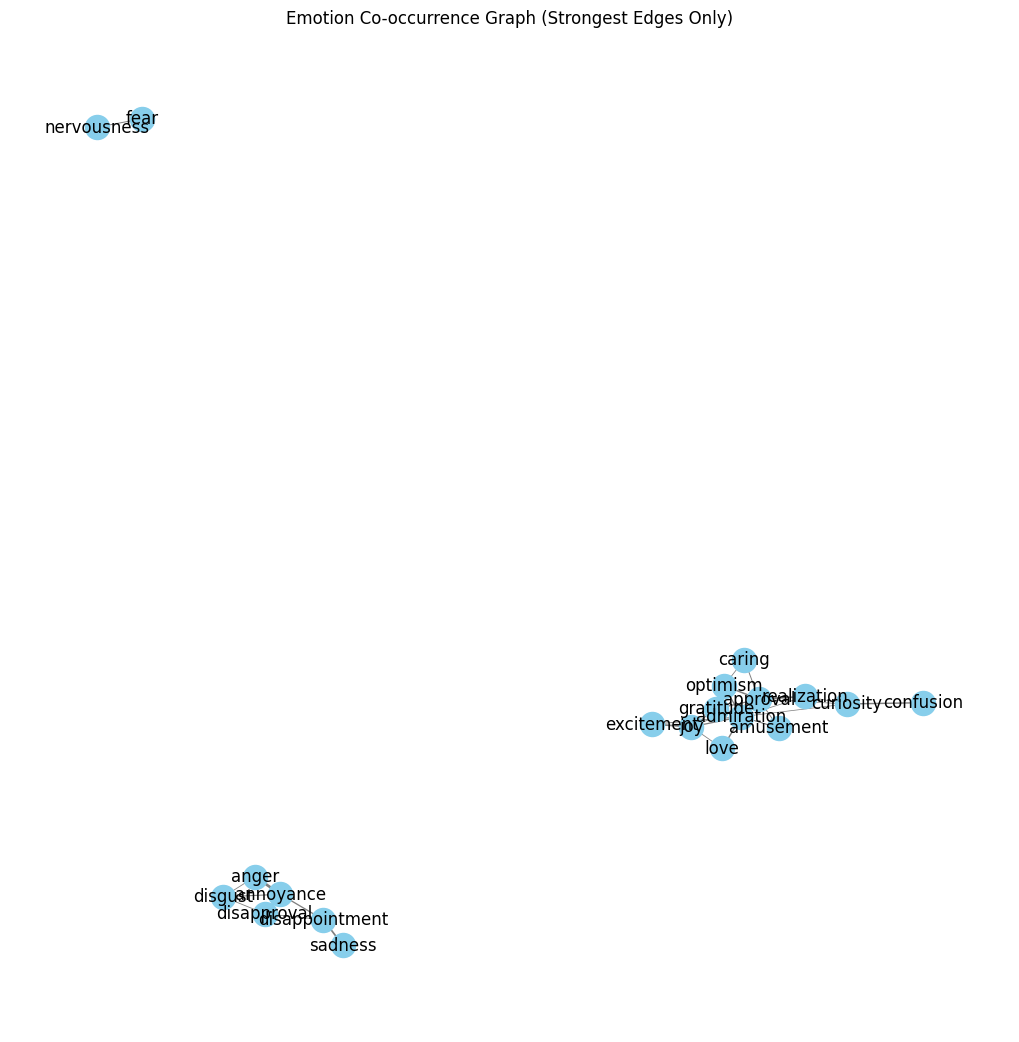

In [84]:
# Filter edges with weight > 100
edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > 100]
H = G.edge_subgraph(edges)

# Recompute positions for H
pos = nx.spring_layout(H, seed=42)

plt.figure(figsize=(10, 10))
nx.draw(
    H, pos,
    with_labels=True,
    width=[H[u][v]['weight'] / 200 for u, v in H.edges()],  # thickness by weight
    node_color='skyblue',
    edge_color='grey'
)
plt.title("Emotion Co-occurrence Graph (Strongest Edges Only)")
plt.show()


In [85]:
label_freq = dedup_df[emotion_cols].sum().sort_values(ascending=False)
print(label_freq)


neutral           15523
admiration         4860
approval           4849
gratitude          3516
annoyance          3481
disapproval        3065
curiosity          2775
amusement          2645
optimism           2432
love               2377
realization        2362
anger              2221
joy                2203
disappointment     2169
confusion          1999
sadness            1839
caring             1595
excitement         1560
surprise           1504
disgust            1362
desire             1013
fear                886
remorse             710
embarrassment       632
nervousness         478
relief              368
pride               353
grief               177
dtype: int64


In [87]:
from numpy import sum as npsum
from numpy import mean
def gini(x):
    # x: array of frequencies
    mad = npsum(np.abs(np.subtract.outer(x, x)))
    return mad / (2 * len(x) * npsum(x))
print("Gini index:", gini(label_freq.values))


Gini index: 0.4491752265485479


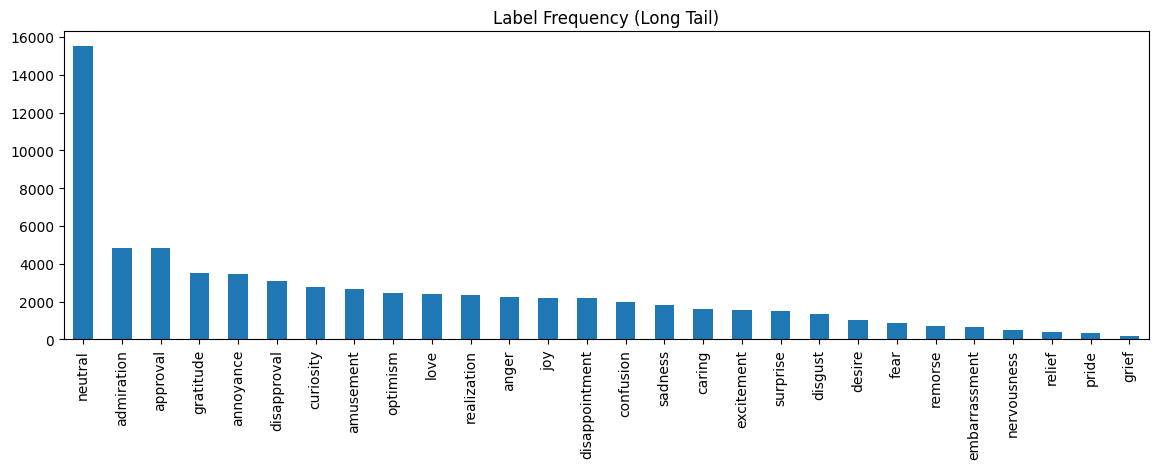

In [88]:
plt.figure(figsize=(14,4))
label_freq.plot(kind='bar')
plt.title('Label Frequency (Long Tail)')
plt.show()


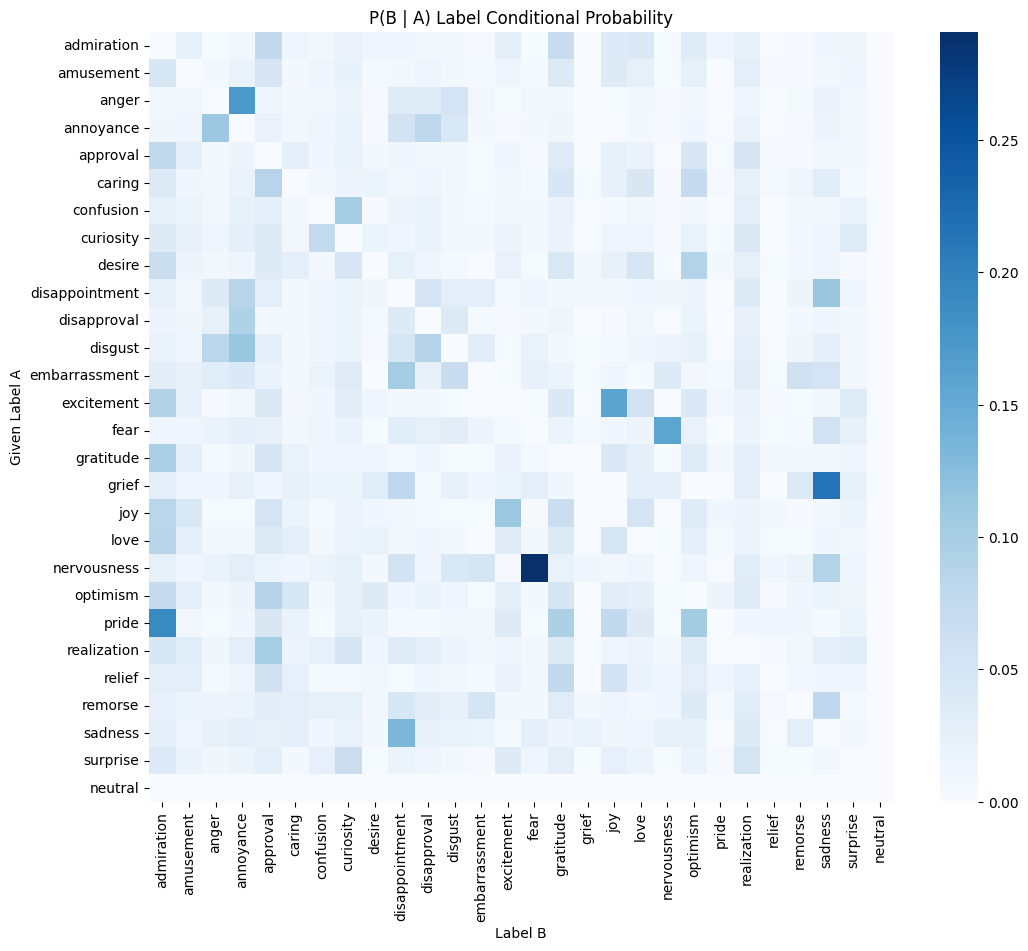

In [89]:
P = np.zeros((len(emotion_cols), len(emotion_cols)))
for i, A in enumerate(emotion_cols):
    A_idx = dedup_df[A] == 1
    for j, B in enumerate(emotion_cols):
        if i != j:
            P[i, j] = dedup_df.loc[A_idx, B].mean()
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(P, xticklabels=emotion_cols, yticklabels=emotion_cols, cmap='Blues')
plt.title('P(B | A) Label Conditional Probability')
plt.xlabel('Label B')
plt.ylabel('Given Label A')
plt.show()


The label conditional probability matrix reveals strong co-occurrence patterns among emotions. For instance, nervousness strongly predicts fear, while joy often co-occurs with excitement, reflecting emotional continuity. Gratitude frequently aligns with admiration, and anger with annoyance, showing intensification paths. Positive emotions like approval and admiration also cluster, indicating shared social contexts. This matrix helps uncover cognitive-emotional dependencies such as confusion leading to curiosity. Overall, these patterns can guide model optimization through co-label boosting, label smoothing, or curriculum learning, ensuring that multi-label predictions reflect real-world emotional entanglements and enhancing both accuracy and interpretability in emotional AI systems.

In [91]:
!pip install umap-learn


  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/6b/b1/c24deeda9baf1fd491aaad941ed89e0fed6c583a117fd7b79e0a33a1e6c0/umap_learn-0.5.9.post2-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.51.2 from https://files.pythonhosted.org/packages/0f/a4/2b309a6a9f6d4d8cfba583401c7c2f9ff887adb5d54d8e2e130274c0973f/numba-0.61.2-cp311-cp311-win_amd64.whl.metadata
  Using cached numba-0.61.2-cp311-cp311-win_amd64.whl.metadata (2.9 kB)
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-0.5.13-py3-none-any.whl.metadata
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for llvmlite<0.45,>=0.44.0dev0 from https://files.pythonhosted.org/packages/5f/c6/258801143975a6d09a373f2641237992496e15567b907a4d401839d671b8/llvmlite-0.44.0-cp311-cp311-win_amd64.whl.me


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


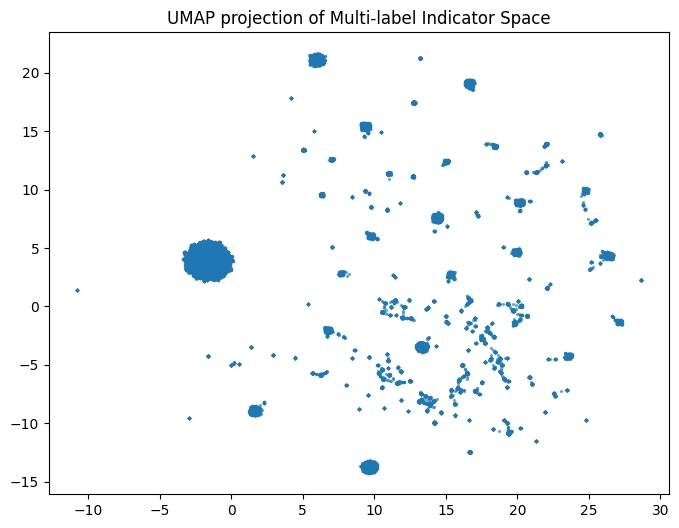

In [90]:
import umap
reducer = umap.UMAP()
X = dedup_df[emotion_cols].values  # binary indicator matrix
embedding = reducer.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1], alpha=0.5, s=2)
plt.title('UMAP projection of Multi-label Indicator Space')
plt.show()


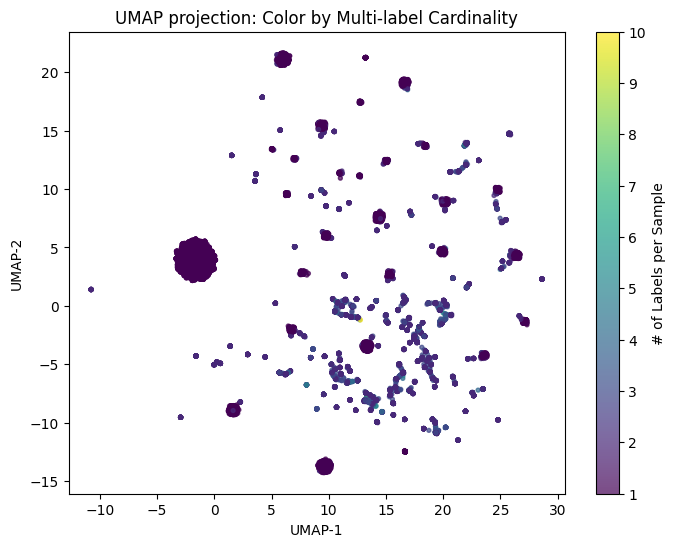

In [91]:
plt.figure(figsize=(8,6))
sc = plt.scatter(
    embedding[:,0], embedding[:,1],
    c=dedup_df['n_labels'], cmap='viridis', s=8, alpha=0.7
)
plt.colorbar(sc, label="# of Labels per Sample")
plt.title("UMAP projection: Color by Multi-label Cardinality")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


The UMAP projections reveal clear insights into the multi-label structure of the emotion dataset. The first plot shows distinct clustering of samples, with one dominant, dense cluster representing the most frequent label combination (e.g., neutral). The second plot, colored by label cardinality, confirms that most samples have only one or two labels, as seen by the predominance of darker colors. Sparse outliers correspond to rare or diverse label combinations. Together, the projections suggest strong skewness in label distribution, limited overlap among many classes, and a small set of dominant emotional configurations shaping the overall data landscape.










In [92]:
from sklearn.cluster import KMeans

n_clusters = 10
km = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = km.fit_predict(embedding)

dedup_df['umap_cluster'] = cluster_labels

for i in range(n_clusters):
    cluster_points = dedup_df[dedup_df['umap_cluster'] == i]
    label_counts = cluster_points[emotion_cols].sum().sort_values(ascending=False)
    print(f"Cluster {i}: N={len(cluster_points)}")
    print(label_counts.head(5))
    print("-" * 30)
from sklearn.cluster import KMeans

n_clusters = 10
km = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = km.fit_predict(embedding)

dedup_df['umap_cluster'] = cluster_labels

for i in range(n_clusters):
    cluster_points = dedup_df[dedup_df['umap_cluster'] == i]
    label_counts = cluster_points[emotion_cols].sum().sort_values(ascending=False)
    print(f"Cluster {i}: N={len(cluster_points)}")
    print(label_counts.head(5))
    print("-" * 30)
from sklearn.cluster import KMeans

n_clusters = 10
km = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = km.fit_predict(embedding)

dedup_df['umap_cluster'] = cluster_labels

for i in range(n_clusters):
    cluster_points = dedup_df[dedup_df['umap_cluster'] == i]
    label_counts = cluster_points[emotion_cols].sum().sort_values(ascending=False)
    print(f"Cluster {i}: N={len(cluster_points)}")
    print(label_counts.head(5))
    print("-" * 30)


Cluster 0: N=15637
neutral        15523
admiration        79
surprise          47
annoyance         32
disapproval       18
dtype: int64
------------------------------
Cluster 1: N=7000
gratitude         2305
approval          1111
annoyance          941
realization        800
disappointment     793
dtype: int64
------------------------------
Cluster 2: N=1688
disgust        771
admiration     580
gratitude      312
annoyance      249
disapproval    248
dtype: int64
------------------------------
Cluster 3: N=3048
admiration    3010
disgust         21
optimism        21
surprise        21
desire          15
dtype: int64
------------------------------
Cluster 4: N=5676
realization    1440
joy            1353
optimism       1341
surprise        961
gratitude       645
dtype: int64
------------------------------
Cluster 5: N=5707
approval     3204
annoyance    2144
confusion     261
curiosity     194
surprise       79
dtype: int64
------------------------------
Cluster 6: N=7037
disapprov

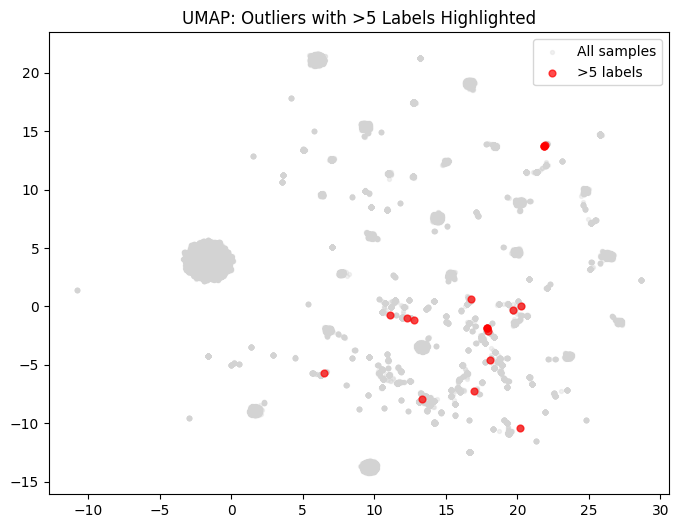

Num outlier samples: 19


In [93]:
outliers = dedup_df[dedup_df['n_labels'] > 5]
plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1], c='lightgrey', s=8, alpha=0.3, label="All samples")
plt.scatter(
    embedding[outliers.index,0], embedding[outliers.index,1],
    c='red', s=24, alpha=0.7, label=">5 labels"
)
plt.legend()
plt.title("UMAP: Outliers with >5 Labels Highlighted")
plt.show()
print(f"Num outlier samples: {len(outliers)}")


This UMAP visualization highlights outlier samples with more than 5 emotion labels (in red), distinguishing them from the rest of the dataset (in gray). These outliers are sparsely scattered across the embedding space and do not belong to the dominant cluster, indicating their rarity and high emotional complexity. Their distribution suggests diverse, non-overlapping label combinations that are semantically or contextually distinct from common patterns. These multi-label samples may represent ambiguous or emotionally rich texts and warrant special attention for model training or annotation review, as they could disproportionately impact classification performance or model interpretability.

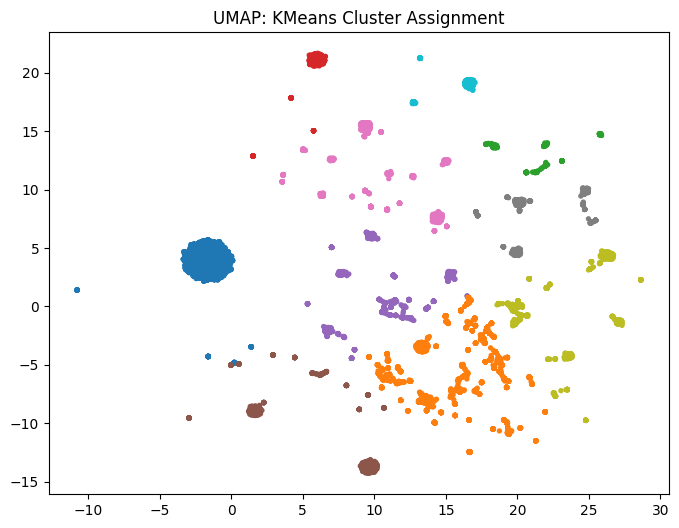

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1], c=cluster_labels, cmap='tab10', s=8)
plt.title("UMAP: KMeans Cluster Assignment")
plt.show()


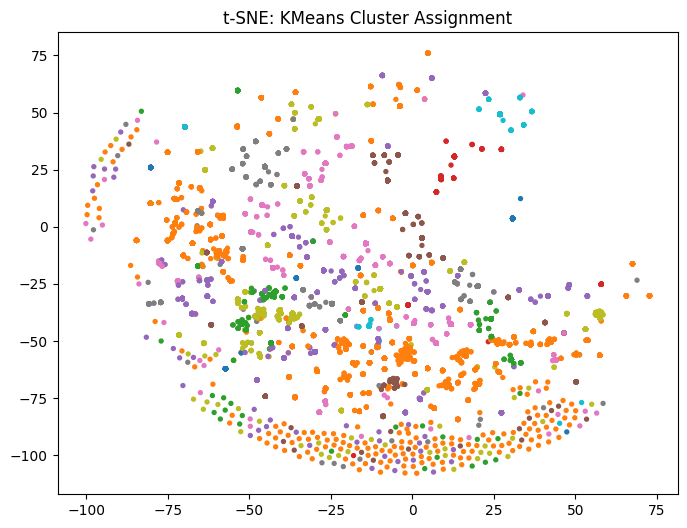

In [95]:
from sklearn.manifold import TSNE
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(tsne_emb[:,0], tsne_emb[:,1], c=cluster_labels, cmap='tab10', s=8)
plt.title("t-SNE: KMeans Cluster Assignment")
plt.show()


The dataset exhibits high label imbalance, with the top 20 label combinations covering nearly 78% of samples and “neutral” dominating single-label counts. The label co-occurrence heatmap reveals strong associations like joy–love and fear–nervousness, while most pairs show weak conditional dependencies. UMAP projections show a dense central cluster, with outliers having >5 labels sparsely distributed, highlighting labeling anomalies. Cardinality color mapping confirms most samples contain few labels. KMeans clustering over UMAP and t-SNE embeddings captures structured label groupings, suggesting latent semantic clusters. t-SNE further reveals curved separability, whereas UMAP better distinguishes label-dense zones and cluster compactness.

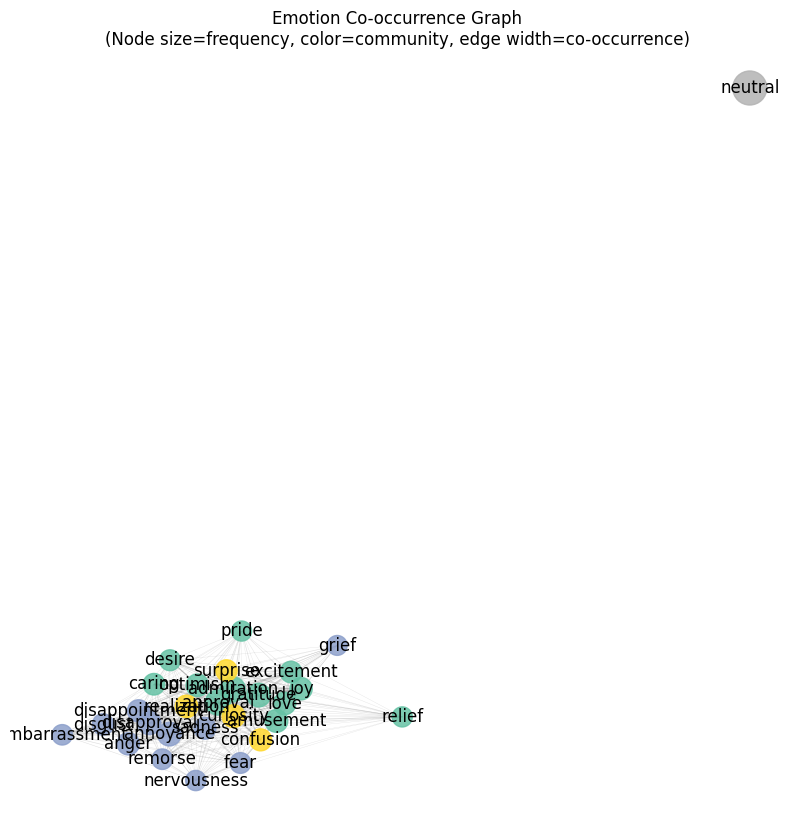

In [96]:
# Suppose G is your co-occurrence graph with emotions as nodes
# label_freq: dictionary or pd.Series mapping emotion → count

nodelist = list(G.nodes())

# Node size by label frequency or degree (scale for readability)
node_sizes = np.array([label_freq.get(n, 1) for n in nodelist])
node_sizes = 400 * (node_sizes / node_sizes.max()) + 200  # min size 200, max size 600

# Node color by community (from Louvain, for example)
# partition: dict emotion → community_id
node_colors = [partition.get(n, 0) for n in nodelist]

# Edge width by weight (scaled)
edge_widths = [0.2 + 2.8 * (G[u][v]['weight'] / max(nx.get_edge_attributes(G, 'weight').values())) for u,v in G.edges()]

# Layout (try spring_layout for force-directed)
pos = nx.spring_layout(G, seed=42, k=0.7)

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.25, edge_color='gray')
nodes = nx.draw_networkx_nodes(
    G, pos, nodelist=nodelist,
    node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Set2, alpha=0.85
)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Emotion Co-occurrence Graph\n(Node size=frequency, color=community, edge width=co-occurrence)")
plt.axis('off')
plt.show()


The emotion co-occurrence graph reveals a clear separation between “neutral” and other emotional states, indicating minimal co-occurrence. The rest of the emotions form a densely connected community with stronger co-association. Emotions like “joy,” “love,” “approval,” and “caring” cluster together, hinting at a positive sentiment core, while emotions like “anger,” “annoyance,” “remorse,” and “disapproval” cluster in another, indicating a negative polarity group. Node sizes reflect frequency, with “neutral” dominating independently. These structural insights validate previous UMAP and clustering findings, confirming that multi-label emotional annotations tend to follow polar sentiment pathways, with neutral acting as a standalone dominant state.

Head labels: ['neutral', 'admiration', 'approval', 'gratitude', 'annoyance', 'disapproval']
Body labels: ['curiosity', 'amusement', 'optimism', 'love', 'realization', 'anger', 'joy', 'disappointment', 'confusion', 'sadness', 'caring', 'excitement', 'surprise', 'disgust', 'desire']
Tail labels: ['fear', 'remorse', 'embarrassment', 'nervousness', 'relief', 'pride', 'grief']
  Group  Num Labels  Num Samples  % of All Samples
0  Head           6        35294         51.184848
1  Body          15        30056         43.588479
2  Tail           7         3604          5.226673


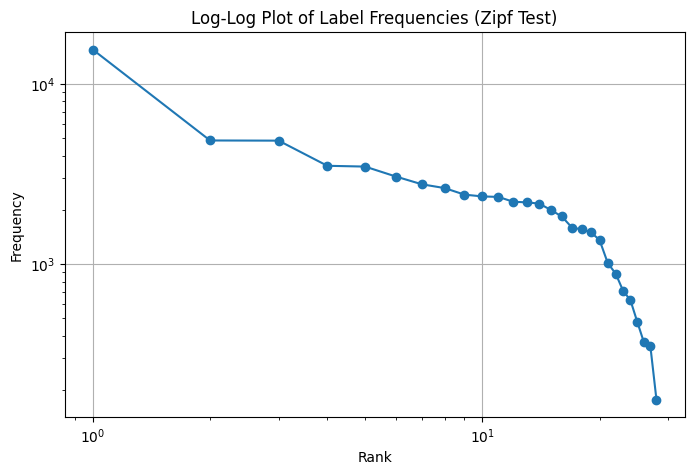

In [97]:
# Assume label_freq (Series) is already computed as before

HEAD_CUTOFF = 3000
TAIL_CUTOFF = 1000

label_freq = dedup_df[emotion_cols].sum().sort_values(ascending=False)
head = label_freq[label_freq > HEAD_CUTOFF]
tail = label_freq[label_freq < TAIL_CUTOFF]
body = label_freq[(label_freq <= HEAD_CUTOFF) & (label_freq >= TAIL_CUTOFF)]

print("Head labels:", list(head.index))
print("Body labels:", list(body.index))
print("Tail labels:", list(tail.index))

def pct(x): return 100 * x / label_freq.sum()

imbalance_summary = pd.DataFrame({
    "Group": ["Head", "Body", "Tail"],
    "Num Labels": [len(head), len(body), len(tail)],
    "Num Samples": [head.sum(), body.sum(), tail.sum()],
    "% of All Samples": [pct(head.sum()), pct(body.sum()), pct(tail.sum())]
})
print(imbalance_summary)

# Log-log plot for Zipf's Law
plt.figure(figsize=(8,5))
plt.loglog(np.arange(1, len(label_freq)+1), label_freq.values, marker='o')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Log-Log Plot of Label Frequencies (Zipf Test)')
plt.grid(True)
plt.show()

The Zipfian distribution of label frequencies reveals a strong power-law behavior, where a few emotions (like “neutral” or “joy”) dominate the dataset, appearing with very high frequency, while most other labels occur significantly less often. The near-linear decline in the log-log plot for the top-ranked labels confirms adherence to Zipf's Law, indicating the natural imbalance in emotional label distribution. This skewed pattern suggests that models trained on such data may become biased toward majority emotions, potentially underperforming on rare yet meaningful emotional states unless properly addressed with rebalancing or augmentation strategies.

Top 10 P(B|A) pairs (off-diagonal):
P(annoyance | anger) = 0.376
P(fear | nervousness) = 0.342
P(sadness | grief) = 0.302
P(nervousness | fear) = 0.265
P(curiosity | confusion) = 0.263
P(joy | excitement) = 0.250
P(admiration | pride) = 0.246
P(annoyance | disapproval) = 0.240
P(anger | annoyance) = 0.227
P(disappointment | sadness) = 0.223


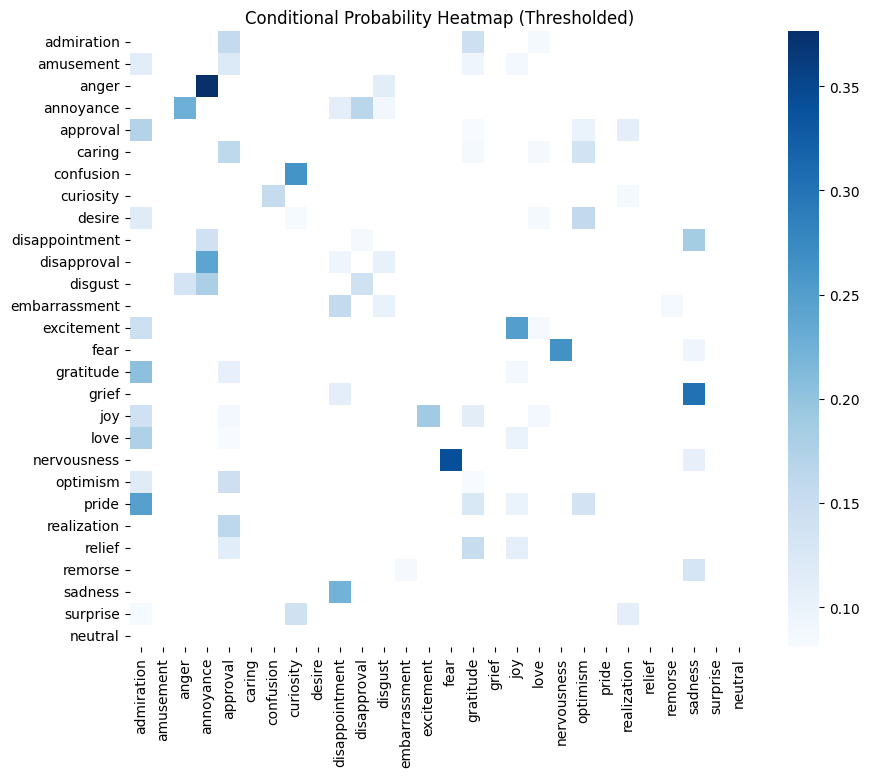

In [98]:
# Compute conditional probabilities P(B|A)
cooc = dedup_df[emotion_cols].T.dot(dedup_df[emotion_cols])
np.fill_diagonal(cooc.values, 0)
cond_prob = cooc.div(cooc.sum(axis=1), axis=0).fillna(0)

# Top 10 off-diagonal conditional pairs
pairs = []
for i, a in enumerate(emotion_cols):
    for j, b in enumerate(emotion_cols):
        if i != j:
            pairs.append((a, b, cond_prob.iloc[i, j]))
top_pairs = sorted(pairs, key=lambda x: -x[2])[:10]
print("Top 10 P(B|A) pairs (off-diagonal):")
for a, b, p in top_pairs:
    print(f"P({b} | {a}) = {p:.3f}")

# Thresholded heatmap (easier to read)
plt.figure(figsize=(10,8))
mask = cond_prob < 0.08   # Only show >8% conditional probability
sns.heatmap(cond_prob, annot=False, cmap="Blues", mask=mask)
plt.title("Conditional Probability Heatmap (Thresholded)")
plt.show()

Conditional Probability Heatmap (Thresholded) & Top P(B|A) Pairs

This thresholded heatmap highlights only high-probability label transitions, focusing attention on meaningful co-occurrences. Notable pairs include annoyance | anger, fear | nervousness, and grief | sadness, reflecting emotional progression or co-activation. The chart is sparse, indicating most labels are conditionally independent. This filtered view aids in identifying dominant emotional pathways in multi-label data. The accompanying top-10 list confirms intuitive emotional chains (e.g., joy → excitement, curiosity → confusion). These insights are valuable for emotion classification, generation, or mental health applications requiring emotional reasoning.

